#SME0130 - Redes Complexas (2023)

## Docente: Francisco Aparecido Rodrigues




### João Victor Sene Araújo
### nUSP: 11796382

In [ ]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

##Caracterização de redes complexas: grau e transitividade

In [ ]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

In [ ]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

###1) Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau.

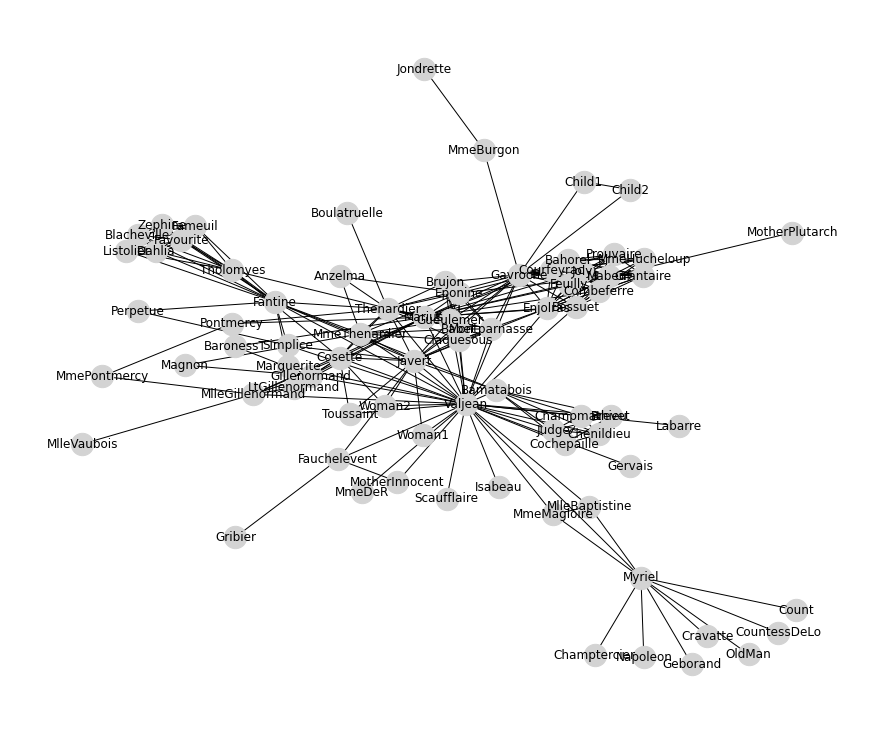

In [ ]:
G= nx.read_gml("data/lesmis.gml")

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [ ]:
print('Terceiro momento:', momment(G,3))
print('Quarto momento:', momment(G,4))

Terceiro momento: 1408.025974025974
Quarto momento: 33592.72727272727


###2) Implemente uma rotina para calcular a medida de complexidade. Qual o valor da complexidade para a rede de energia elétrica dos EUA (Base powergrid).

In [ ]:
def complexyCoefficient(G):
    return momment(G,2)/momment(G,1)

In [ ]:
G = nx.read_edgelist("data/powergrid.txt", nodetype=int)

In [ ]:
print('Medida de complexidade:', complexyCoefficient(G))

Medida de complexidade: 3.8712465878070974


###3) Implemente uma rotina para calcular a entropia de Shannon e calcule essa medida para a base de estradas da Europa (base euroroad).

In [ ]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [ ]:
G = nx.read_edgelist("data/euroroad.txt", nodetype=int)

In [ ]:
print('Entropia de Shannon:', shannon_entropy(G))

Entropia de Shannon: 2.0033103874527756


###4) Calcule as medidas transitivity e average clustering coefficient para a base de dados de aeroportos do EUA (base usairport).

In [ ]:
G= nx.read_edgelist("data/usairport.txt", nodetype=int, data=(('weight',float),))

In [ ]:
print("Transitivity =", nx.transitivity(G))

Transitivity = 0.38414344664491556


In [ ]:
print("Average clustering =", nx.average_clustering(G))

Average clustering = 0.5041525392095769


###5) Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport).

In [ ]:
print('Medida de complexidade:', complexyCoefficient(G))

Medida de complexidade: 112.22224803950043


In [ ]:
print('Entropia de Shannon:', shannon_entropy(G))

Entropia de Shannon: 4.985977646539227
